<a href="https://colab.research.google.com/github/AnnaIvanova90/zak-5/blob/main/homework-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Понимание бизнеса

##1.1 Цель

Отнести вино к одной из трех категорий, на основе его химического анализа

##1.2 Описание

Данные представляют союой результат химического анализа вин, выращенных в одном регионе Италии тремя различными землевладельцами. В датасете представлены 13 различных измерений для разных составляющих, обнаруженных в трех типах вина

# 2. Понимание данных

## 2.1 Импорт библиотек

In [13]:
import numpy as np
import pandas as pd

# Визуализация
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Алгоритмы
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer ,StandardScaler
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 2.2 Вспомогательные функции

In [3]:
def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

## 2.3 Загрузка данных

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

##2.4 Статистика и визуализации

In [5]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Описание переменных:


*   Alcohol: алкоголь 
*   Malic Acid: Яблочная кислота   
*   Ash: Зола (полученная после выпарки вина)                          
*   Alcalinity of Ash: Кислотность золы           
*   Magnesium: Магний                   
*   Total Phenols: Общие фенолы               
*   Flavanoids: Флавоноиды                  
*   Nonflavanoid Phenols: Нефлавоноидные фенолы        
*   Proanthocyanins: Проантоцианидины              
*   Colour Intensity: Цветовая интенсивность            
*   Hue: Оттенок  
*   OD280/OD315 of diluted wines: Измерения содержания белка
*   Proline: Пролин (аминокислота)    



##2.4.1 Тип данных и наличие пропусков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

##2.4.2 Ключевая информация о переменных:


In [7]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##2.4.3 Тепловая карта корреляции 

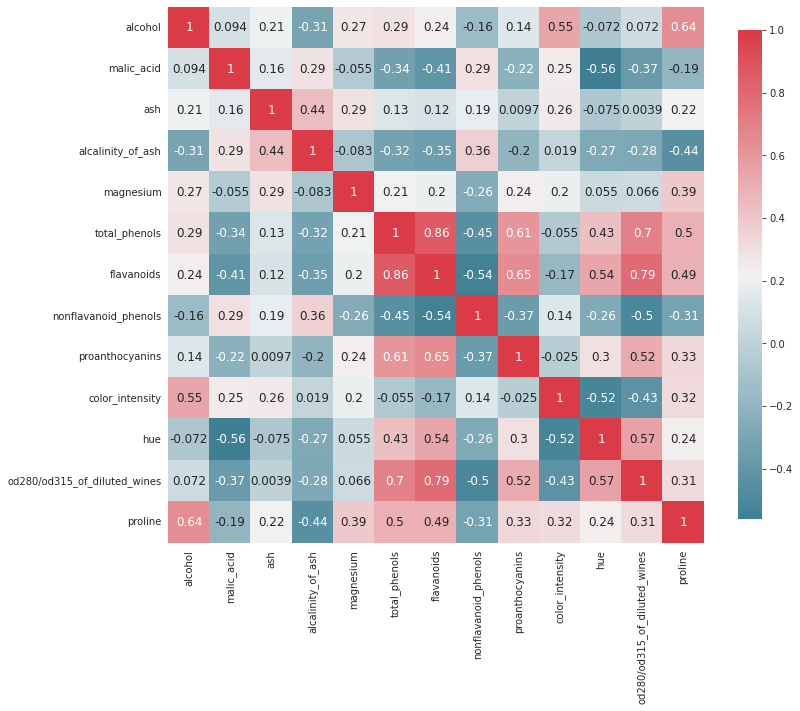

In [8]:
plot_correlation_map(data)


##3. Подготовка данных

# 3.1 Отделяем данные для обучения и для проверки

Исходный датасет необходимо разделить на данные для обучения, валидации и теста

In [9]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(data, data_class, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25)

In [10]:
print (X_train.shape , X_valid.shape , y_train.shape , y_valid.shape , X_test.shape)

(99, 13) (34, 13) (99,) (34,) (45, 13)


# 3.2 Стандртизация данных
Так как в датасете содержаться данные различных порядков, проведем стандартизацию

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

##Важность признаков

1.0


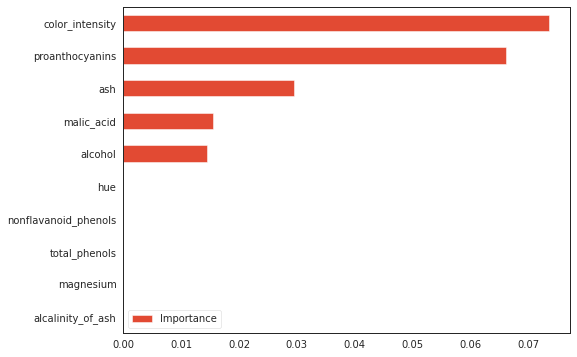

In [54]:
plot_variable_importance(X_train, y_train)

## 4. Моделирование
#4.1 Выбор модели
Будем использовать дерево решений

In [49]:
model = DecisionTreeClassifier(max_depth=3)


#4.2 Обучение модели

In [50]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 5. Оценка

##5.1 Точность на обучающих данных и на валидации

In [51]:
print (model.score(X_train_scaled, y_train) , model.score(X_valid_scaled, y_valid))

0.98989898989899 0.9411764705882353
